In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import glob
import os

The data was collected with bash scripts and commandline tools

In [65]:
df = pd.read_csv('vep_stats.csv')

In [66]:
df = df.dropna()

In [67]:
df

,sample,type,"fastq, GB","snp, total",MODIFIER,LOW,MODERATE,HIGH,"MODIFIER, %","LOW, %",...,"LOW, filt, %","MODERATE, filt, %","HIGH, filt, %",filt het,filt hom,filt het/hom,gatk pass MQ40,"gatk pass MQ40, %",gatk pass MQ30,"gatk pass MQ30, %"
0,HG00121,modern,13.0,1034246.0,1025774.0,4955.0,3351.0,166.0,99.180853,0.479093,...,0.442004,0.330304,0.014380,159344.0,529061.0,0.301183,2082,0.201306072,1015687,98.20555264
1,HG00099,modern,18.0,1423983.0,1412358.0,6790.0,4577.0,258.0,99.183628,0.476832,...,0.433233,0.321561,0.016846,284089.0,659647.0,0.430668,2764,0.194103441,1387846,97.46225903
2,HG00114,modern,7.5,427171.0,425195.0,1164.0,767.0,45.0,99.537422,0.272490,...,0.254852,0.183480,0.012534,44315.0,242883.0,0.182454,986,0.230820912,413774,96.86378523
3,HG00119,modern,3.7,125390.0,124367.0,610.0,386.0,27.0,99.184145,0.486482,...,0.434901,0.294687,0.021389,8658.0,75488.0,0.114694,287,0.228885876,124788,99.51989792
4,HG00126,modern,5.2,308620.0,305810.0,1665.0,1087.0,58.0,99.089495,0.539498,...,0.501657,0.355922,0.018277,27364.0,180526.0,0.151579,614,0.198950165,306723,99.38532824
5,HG00136,modern,8.1,483355.0,480796.0,1465.0,1027.0,67.0,99.470575,0.303090,...,0.282685,0.218593,0.014243,53282.0,269660.0,0.197590,1027,0.212473234,477719,98.8339833
6,HG00154,modern,7.7,342213.0,340394.0,1065.0,701.0,53.0,99.468460,0.311210,...,0.287636,0.208952,0.013114,33404.0,195333.0,0.171011,957,0.279650393,339316,99.15345121
7,HG00171,modern,2.7,132382.0,131676.0,407.0,278.0,21.0,99.466695,0.307444,...,0.273963,0.226269,0.014419,7850.0,82296.0,0.095387,165,0.124639301,130615,98.66522639
8,HG00234,modern,27.0,1937337.0,1922177.0,8807.0,5987.0,366.0,99.217483,0.454593,...,0.413542,0.308594,0.016489,467780.0,811753.0,0.576259,3497,0.180505508,1871159,96.58407391
9,HG00239,modern,7.9,466052.0,464181.0,1063.0,757.0,51.0,99.598543,0.228086,...,0.205168,0.165874,0.009985,62349.0,248094.0,0.251312,1086,0.233021208,444098,95.28936685


/var/folders/kt/0jm5h5t95fd8l6d8ltjfn_5r0000gn/T/ipykernel_56865/1175574699.py:14: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


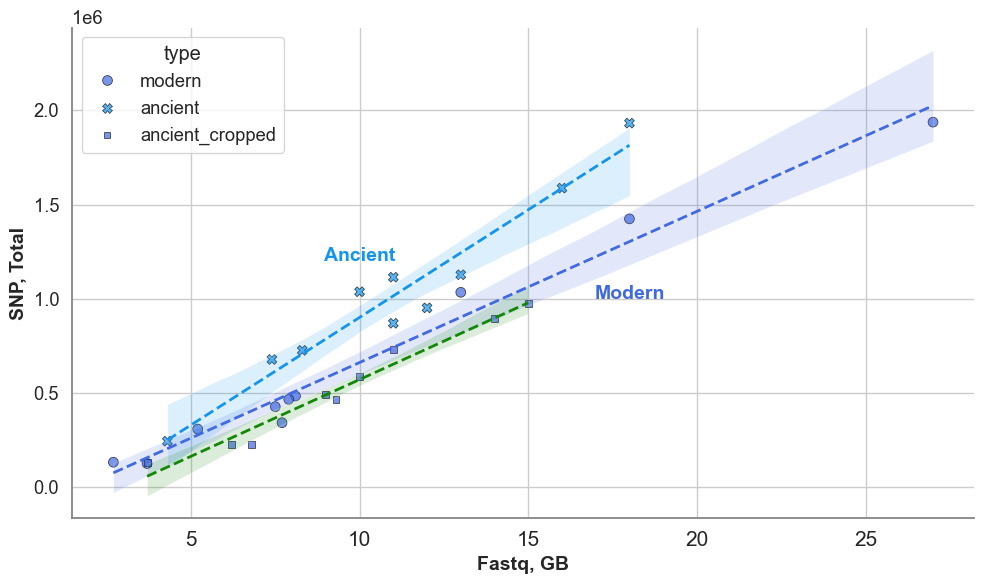

In [68]:
sns.set_style("whitegrid")  
plt.rcParams.update({"font.size": 12, "axes.edgecolor": "gray"})  

plt.figure(figsize=(10, 6))

modern = df[df["type"] == "modern"]
ancient = df[df["type"] == "ancient"]
ancient_cropped = df[df["type"] == "ancient_cropped"]

modern_color = "#4169E1"  
ancient_color = "#1495ED"  
ancient_cropped_color = "#138808" 

sns.scatterplot(
    data=df, x="fastq, GB", y="snp, total", hue="type", style="type",
    s=50, palette=[modern_color, ancient_color], alpha=0.7, edgecolor="black"
)

sns.regplot(data=modern, x="fastq, GB", y="snp, total", scatter=False, color=modern_color, line_kws={"lw": 2, "linestyle": "--"})
sns.regplot(data=ancient, x="fastq, GB", y="snp, total", scatter=False, color=ancient_color, line_kws={"lw": 2, "linestyle": "--"})
sns.regplot(data=ancient_cropped, x="fastq, GB", y="snp, total", scatter=False, color=ancient_cropped_color, line_kws={"lw": 2, "linestyle": "--"})

plt.text(18, 1000000,  
         "Modern", fontsize=14, color=modern_color, weight="bold", ha="center")

plt.text(10, 1200000,  
         "Ancient", fontsize=14, color=ancient_color, weight="bold", ha="center")

plt.xlabel("Fastq, GB", fontsize=14, fontweight="bold")
plt.ylabel("SNP, Total", fontsize=14, fontweight="bold")

sns.despine()

plt.savefig('snp_count_all_gb.png')
plt.show()


Quantity, % of total of annotated variants (MODIFIER, LOW, MODERATE,HIGH) for modern and ancient samples:
p-values are calculated below.

/var/folders/kt/0jm5h5t95fd8l6d8ltjfn_5r0000gn/T/ipykernel_56865/4203703897.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/var/folders/kt/0jm5h5t95fd8l6d8ltjfn_5r0000gn/T/ipykernel_56865/4203703897.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/var/folders/kt/0jm5h5t95fd8l6d8ltjfn_5r0000gn/T/ipykernel_56865/4203703897.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/var/folders/kt/0jm5h5t95fd8l6d8ltjfn_5r0000gn/T/ipykernel_56865/4203703897.py:35: UserWarning: No artists with labels found to put in legend.

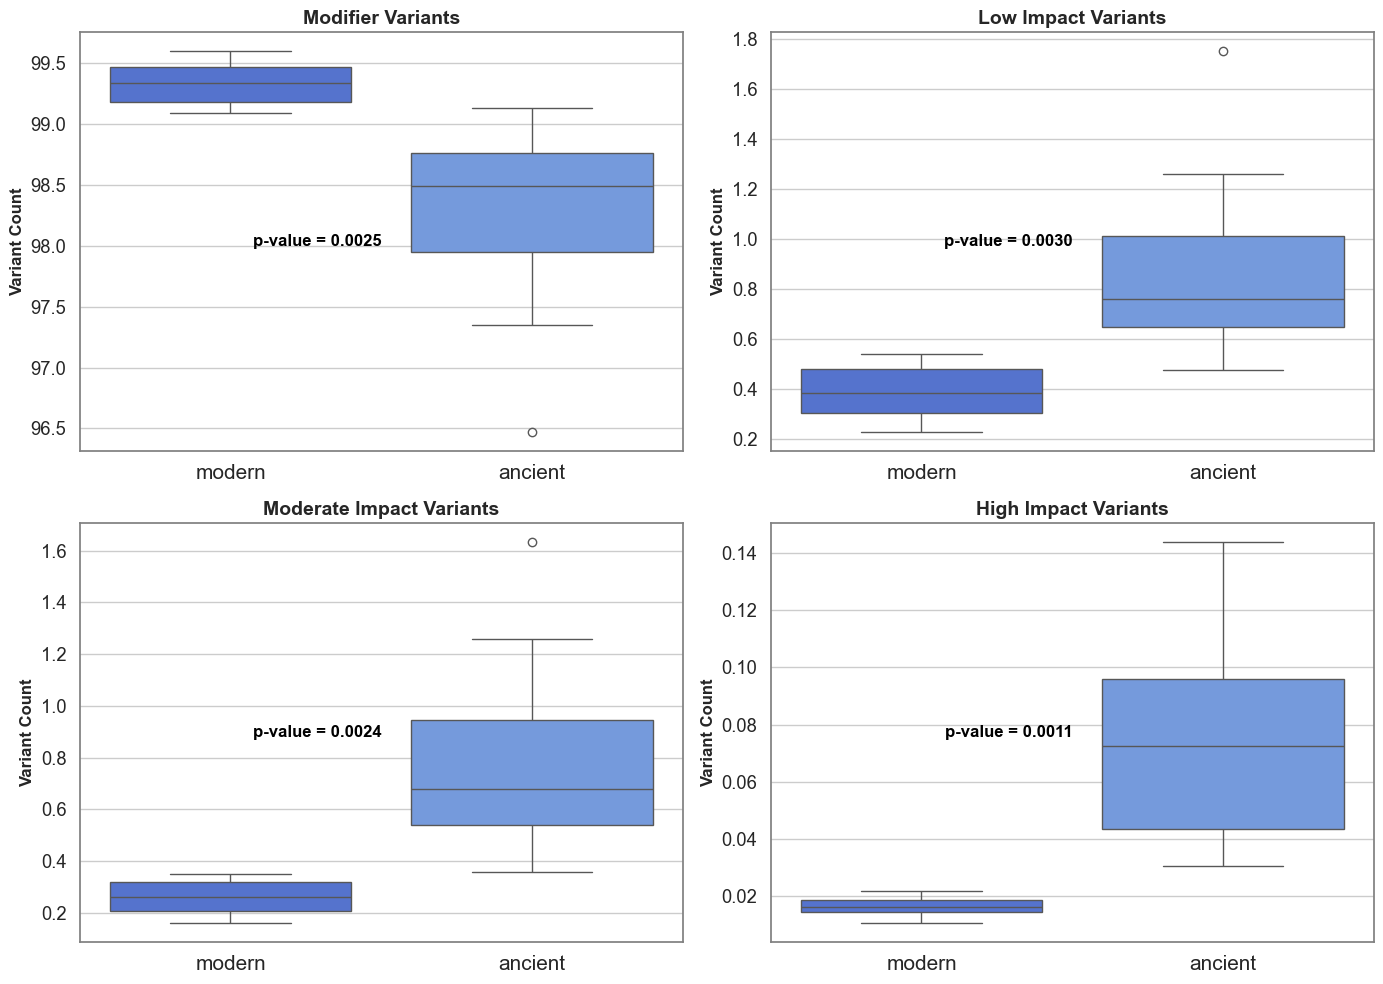

In [69]:
sns.set_style("whitegrid") 
plt.rcParams.update({"font.size": 12, "axes.edgecolor": "gray"}) 

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


columns = ["MODIFIER, %", "LOW, %", "MODERATE, %", "HIGH, %"]
titles = ["Modifier Variants", "Low Impact Variants", "Moderate Impact Variants", "High Impact Variants"]


p_values = {
    "MODIFIER, %": 0.0025,
    "LOW, %": 0.0030,
    "MODERATE, %": 0.0024,
    "HIGH, %": 0.0011
}

modern_color = "#4169E1" 
ancient_color = "#6495ED"  

df_2types = df[df['type'].isin(['modern', 'ancient'])]

palette = [modern_color, ancient_color]


for ax, col, title in zip(axes.flatten(), columns, titles):
    sns.boxplot(x="type", y=col, hue="type", data=df_2types, ax=ax, palette=palette, legend=False)
    
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Variant Count", fontsize=12, fontweight="bold")

    ax.text(0.5, 0.5, f"p-value = {p_values[col]:.4f}", ha='right', va='center', fontsize=12, fontweight='bold', color='black', transform=ax.transAxes)

    ax.legend().set_visible(False)

plt.tight_layout()

plt.savefig('boxplots.png')
plt.show()


In [70]:
categories = ["MODIFIER, %", "LOW, %", "MODERATE, %", "HIGH, %"]

for category in categories:
    modern_values = df[df["type"] == "modern"][category]
    ancient_values = df[df["type"] == "ancient"][category]
    
    t_stat, p_value = stats.ttest_ind(modern_values, ancient_values, equal_var=False)
    
    print(f"p-value for {category}")
    print(f"{p_value:.4f}")
    
    print('')

p-value for MODIFIER, %
0.0025

p-value for LOW, %
0.0030

p-value for MODERATE, %
0.0024

p-value for HIGH, %
0.0011



Heterozygosity/homosigosity ratio for modern/ancient/ancient_cropped:

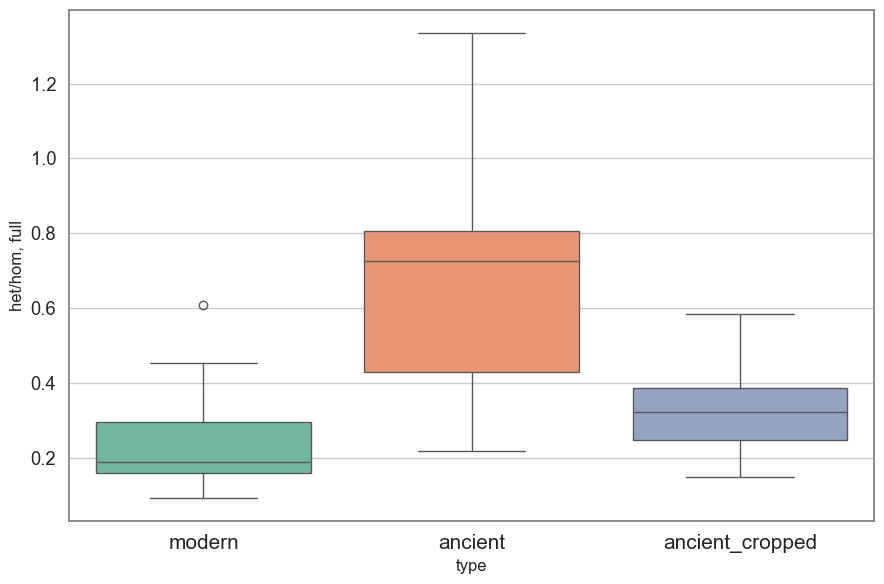

In [71]:
plt.figure(figsize=(9, 6))

sns.boxplot(x="type", y='het/hom, full', hue="type", data=df, palette="Set2", legend=False)

plt.savefig('hethom.png')
plt.show()

Heatmap for all the 12 types of sunstitutions:
High rate of C->T and G->A substitutions in ancient samples

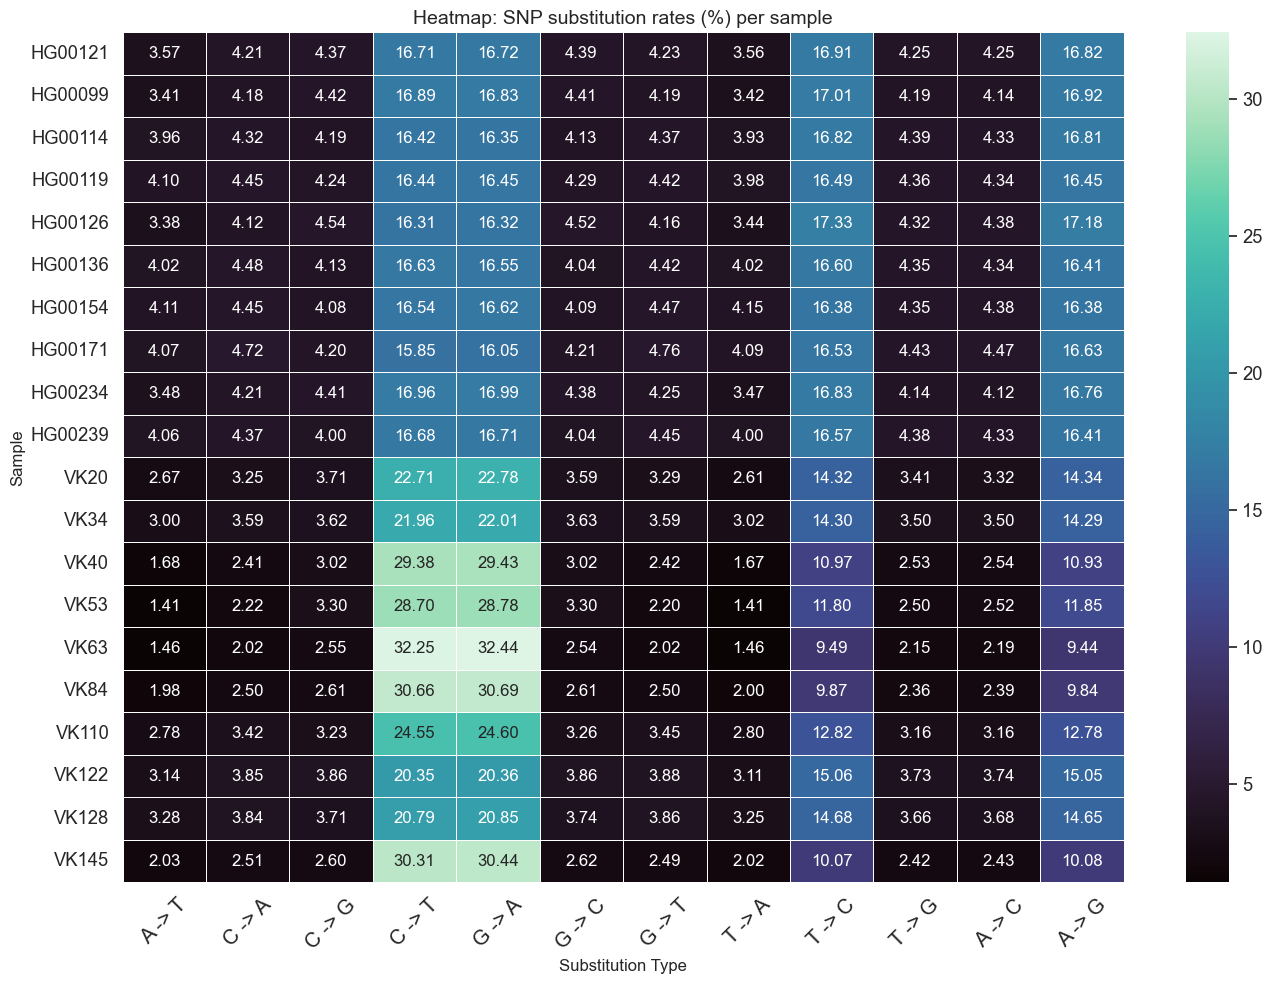

In [72]:
subs_cols = ["A -> T", "C -> A", "C -> G", "C -> T", "G -> A", "G -> C",
             "G -> T", "T -> A", "T -> C", "T -> G",  " A -> C", "A -> G"]


heatmap_data = df_2types[subs_cols]
heatmap_data.index = df_2types["sample"]


plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="mako", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap: SNP substitution rates (%) per sample")
plt.ylabel("Sample")
plt.xlabel("Substitution Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()


Cropping ancient reads by 7 bp from each side reduces C -> T rate:

/var/folders/kt/0jm5h5t95fd8l6d8ltjfn_5r0000gn/T/ipykernel_56865/610741803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


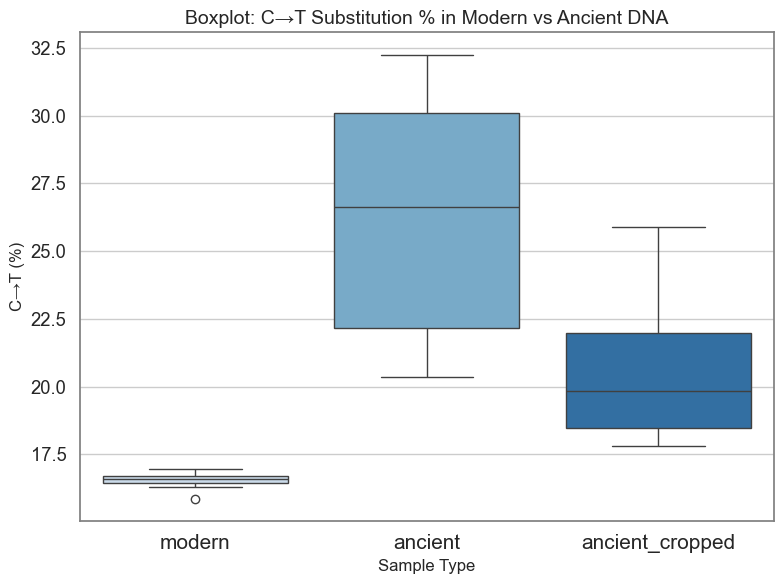

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="type",   
    y="C -> T",
    palette=sns.color_palette("Blues", n_colors=3) ) 


plt.title("Boxplot: C→T Substitution % in Modern vs Ancient DNA")
plt.ylabel("C→T (%)")
plt.xlabel("Sample Type")
plt.tight_layout()
plt.savefig('C-T.png')
plt.show()

Het/Hom ratio without C->T and G->A substitution:

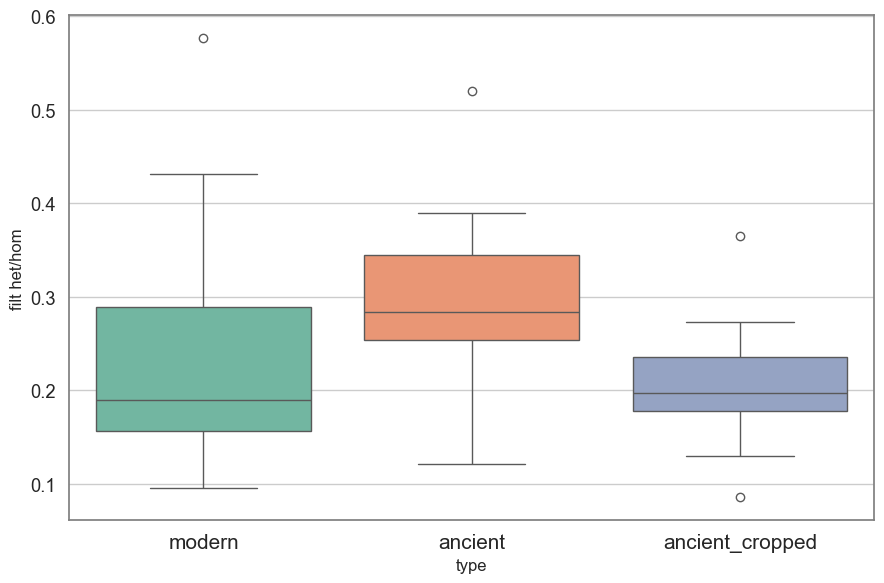

In [74]:
plt.figure(figsize=(9, 6))

sns.boxplot(x="type", y='filt het/hom', hue="type", data=df, palette="Set2", legend=False)

plt.savefig('hethom filt.png')
plt.show()

For modern filtering out substitutions has no effect on het/hom ratio. But ancient and ancient_cropped samples after filtering have
closer het/hom ratio to modern samles. Ancient_cropped and modern have no siqnificiant difference.

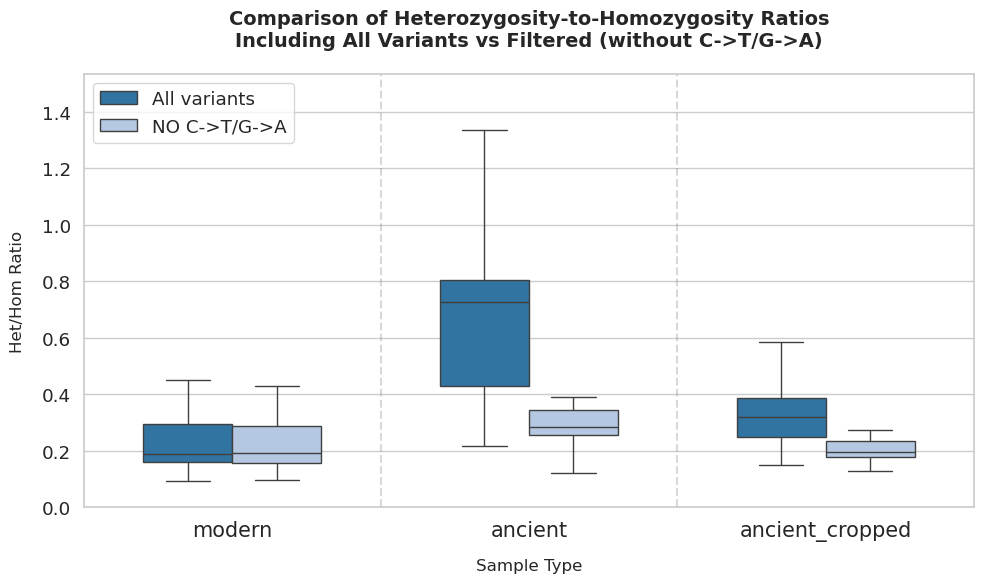

In [75]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['figure.autolayout'] = True

df_melted = pd.melt(df, id_vars=['type'], 
                   value_vars=['het/hom, full', 'filt het/hom'],
                   var_name='metric', 
                   value_name='value')

plt.figure(figsize=(10, 6))

custom_palette = {
    'het/hom, full': '#1f77b4',  
    'filt het/hom': '#aec7e8'  
}

ax = sns.boxplot(
    x="type",
    y="value",
    hue="metric",
    data=df_melted,
    palette=custom_palette,
    linewidth=1,
    width=0.6,
    order=["modern", "ancient", "ancient_cropped"],
    showfliers=False  
)

plt.title("Comparison of Heterozygosity-to-Homozygosity Ratios\nIncluding All Variants vs Filtered (without C->T/G->A)", 
          pad=20, fontweight='bold')
plt.xlabel("Sample Type", labelpad=12)
plt.ylabel("Het/Hom Ratio", labelpad=12)

y_max = max(df_melted['value']) * 1.15
plt.ylim(0, y_max)

handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles,
           labels=['All variants', 'NO C->T/G->A'],
           loc='upper left', 
           frameon=True,    
           framealpha=0.8)

for i in range(1, 3):
    ax.axvline(i - 0.5, color='gray', linestyle='--', alpha=0.3)

for i, box in enumerate(ax.artists):
    box.set_edgecolor('black')

    x_pos = box.get_x() + box.get_width()/2.
    y_pos = df_melted.groupby(['type', 'metric'])['value'].mean().values[i]
    ax.plot(x_pos, y_pos, 'k_', markersize=12, markeredgewidth=2)

plt.tight_layout()
plt.savefig('het_hom_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
modern = df[df['type'] == 'modern']['filt het/hom']
ancient_cropped = df[df['type'] == 'ancient_cropped']['filt het/hom']
_, p_modern = stats.shapiro(modern)
_, p_ancient = stats.shapiro(ancient_cropped)

print(f"p-value (modern): {p_modern:.3f}")
print(f"p-value (ancient_cropped): {p_ancient:.3f}")

p-value (modern): 0.079
p-value (ancient_cropped): 0.771


In [77]:
u_stat, p_value = stats.mannwhitneyu(
    modern, 
    ancient_cropped, 
    alternative='two-sided'
)
print(f"p-value = {p_value:.5f}")

p-value = 0.90252


Summarising varian types amount, % for all the samples before and after elimination of C->T and G->A:

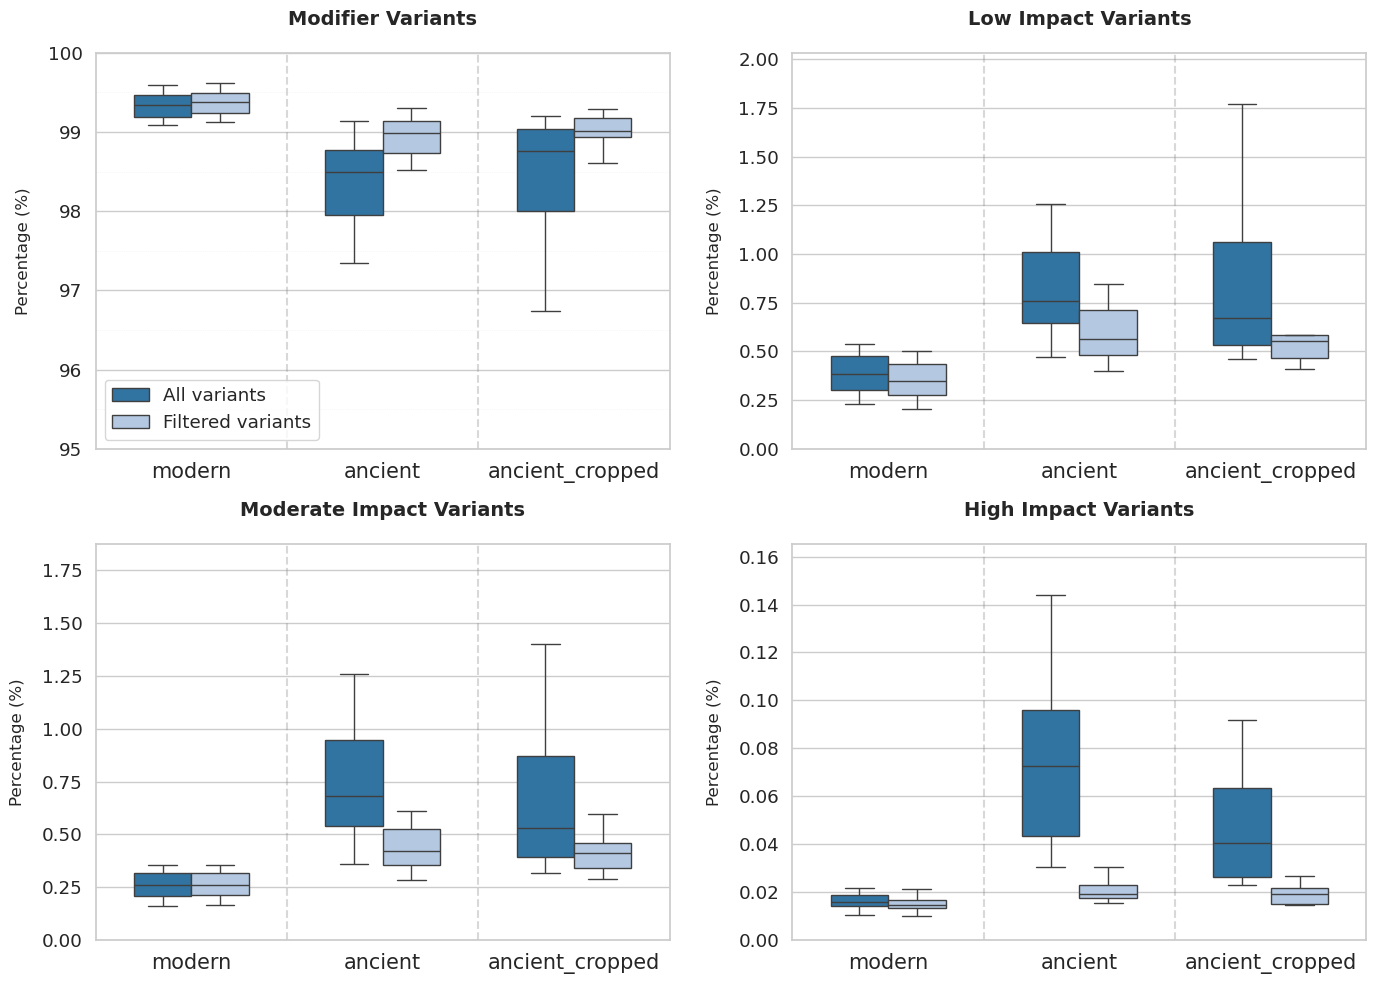

In [79]:
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'figure.autolayout': True,
    'xtick.labelsize': 15
})

palette = {
    'all': '#1f77b4',  
    'filtered': '#aec7e8' 
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plot_config = [
    {"cols": ("MODIFIER, %", "MODIFIER, filt, %"), 
     "title": "Modifier Variants",
     "ylim": (95, 100)}, 
    
    {"cols": ("LOW, %", "LOW, filt, %"), 
     "title": "Low Impact Variants",
     "ylim": (0, None)},  
     
    {"cols": ("MODERATE, %", "MODERATE, filt, %"), 
     "title": "Moderate Impact Variants",
     "ylim": (0, None)}, 
     
    {"cols": ("HIGH, %", "HIGH, filt, %"), 
     "title": "High Impact Variants",
     "ylim": (0, None)}  
]

for ax, config in zip(axes.flatten(), plot_config):
    col_all, col_filt = config["cols"]
    
    df_melted = pd.melt(
        df,
        id_vars=['type'],
        value_vars=[col_all, col_filt],
        var_name='metric',
        value_name='value'
    )
    
    df_melted['metric'] = df_melted['metric'].apply(
        lambda x: 'all' if 'filt' not in x else 'filtered'
    )
    
    sns.boxplot(
        x="type",
        y="value",
        hue="metric",
        data=df_melted,
        ax=ax,
        palette=palette,
        order=["modern", "ancient", "ancient_cropped"],
        width=0.6,
        linewidth=1,
        showfliers=False
    )
    
    ax.set_title(config["title"], pad=20, fontweight='bold')
    ax.set_xlabel("", labelpad=12)
    ax.set_ylabel("Percentage (%)", labelpad=12)
    
    if config["ylim"] == (95, 100):
        ax.set_ylim(95, 100)
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
        ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.3)
    else:
        y_max = df_melted['value'].max() * 1.15
        ax.set_ylim(0, y_max)
        
    for i in range(1, 3):
        ax.axvline(i - 0.5, color='gray', linestyle='--', alpha=0.3)
    
    for i, box in enumerate(ax.artists):
        box.set_edgecolor('black')
        x_pos = box.get_x() + box.get_width()/2.
        y_pos = df_melted.groupby(['type', 'metric'])['value'].mean().values[i]
        ax.plot(x_pos, y_pos, 'k_', markersize=12, markeredgewidth=2)

    if config["title"] == "Modifier Variants":
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles=handles,
                 labels=['All variants', 'Filtered variants'],
                 loc='lower left',
                 frameon=True,
                 framealpha=0.8)
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.savefig('variant_impact_comparison_95-100.png', dpi=300, bbox_inches='tight')
plt.show()

In [82]:
modern = df[df['type'] == 'modern']['HIGH, filt, %']
ancient_cropped = df[df['type'] == 'ancient_cropped']['HIGH, filt, %']

In [85]:
_, p_modern = stats.shapiro(modern)
_, p_ancient = stats.shapiro(ancient_cropped)

print(f"p-value (modern): {p_modern:.3f}") 
print(f"p-value (ancient_cropped): {p_ancient:.3f}")

p-value (modern): 0.913
p-value (ancient_cropped): 0.342


In [87]:
t_stat, p_val = stats.ttest_ind(modern, ancient_cropped)

print(f"p-value = {p_val:.4f}")

p-value = 0.0260
